# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [14]:
def bayes_rule(priors, likelihoods):
    '''
    function will compute the marginal (marg) and then use Bayes' Theorem to calculate the 
    posterior probabilities for the each of the hypotheses (post)    
    '''
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [11]:
# bowl_1 = 30v + 10c
# bowl_2 = 20v + 20c
# calculate the probability that the vanilla cookie you picked came from Bowl 1

priors = [0.5, 0.5]
likelihoods = [0.75, 0.5]

marg = sum(np.multiply(priors, likelihoods))
post = np.divide(np.multiply(priors, likelihoods), marg)
print(post[0])

0.6


- From these results, we can see that there is a **60% chance** that the vanilla cookie came from bowl 1

What is the probability that it came from Bowl 2?

In [15]:
print(post[1])

0.4


- There is a **40% chance** that it came from bowl 2

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [8]:
# bowl_1 = 30v + 10c
# bowl_2 = 20v + 20c
# calculate the probability that a chocoloate cookie you picked came from Bowl 1 or Bowl 2

priors = [0.5, 0.5]
likelihoods = [0.25, 0.5]

bayes_rule(priors, likelihoods)

array([0.33333333, 0.66666667])

- From these results, we can see that there is a **33.3% chance** that the chocolate cookie came from bowl 1 and **66.7% chance** it came from Bowl 2

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [37]:
# bag_1 = 0.3b, 0.2y, 0.2r, 0.1g, 0.1o, 0.1t
# bag_2 = 0.24b, 0.2g, 0.16o, 0.14y, 0.13r, 0.13b
# probability that the yellow one came from the Bag 1

priors = [0.5, 0.5]
likelihoods = [0.2, 0.14]

yellow = bayes_rule(priors, likelihoods).round(3)

print(f'Probability that the yellow one came from the Bag 1: {yellow[0]*100}%')

Probability that the yellow one came from the Bag 1: 58.8%


What is the probability that the yellow candy came from Bag 2?

In [39]:
print(f'Probability that the yellow one came from the Bag 2: {yellow[1]*100}%')

Probability that the yellow one came from the Bag 2: 41.199999999999996%


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [40]:
# probability that the green one came from the Bag 1 and 2

priors = [0.5, 0.5]
likelihoods = [0.1, 0.2]

green = bayes_rule(priors, likelihoods).round(3)

print(f'Probability that the green one came from the Bag 1: {green[0]*100}%')
print(f'Probability that the green one came from the Bag 2: {green[1]*100}%')

Probability that the green one came from the Bag 1: 33.300000000000004%
Probability that the green one came from the Bag 2: 66.7%


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [51]:
# Probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

# Each door has 1/3 of chance of having the car prior to any choice or openning
# When one door is open, only two door are left

priors = [0.3, 0.3, 0.3]
likelihoods = [0.5, 0, 1]

monty_hall = bayes_rule(priors, likelihoods)

switch_door_c = monty_hall[0].round(2)
stick_door_a = monty_hall[2].round(2)

print(f'Probabilities of winning the car if if you switch to Door C: {switch_door_c}')
print(f'Probabilities of winning the car if you stick with Door A: {stick_door_a}')

Probabilities of winning the car if if you switch to Door C: 0.33
Probabilities of winning the car if you stick with Door A: 0.67


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

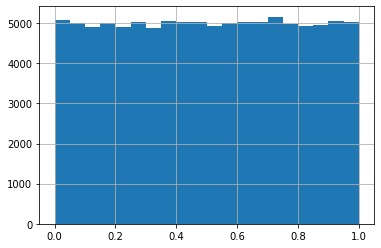

In [54]:
n_draws = 100000
prior = pd.Series(stats.uniform(0,1).rvs(n_draws))
prior.hist(bins=20)

Produce a set of descriptive statistics for the posterior distribution.

In [59]:
# Time to observe some data and see how this affects our estimates. 
# First day, 100 people visited our site and 14 of them made a purchase
# We are going to record the number of purchases in a variable called observed

observed = 14

What is the 90% credible interval range?

In [64]:
# Creatin a generative model that will randomly draw from our prior uniform distribution, 
# simulate 50 people coming to our website a large number of time, and see how many times we get a 
# result that is in line with the result we have observed

def generative_model(param):
    result = stats.binom(100, param).rvs()
    return result

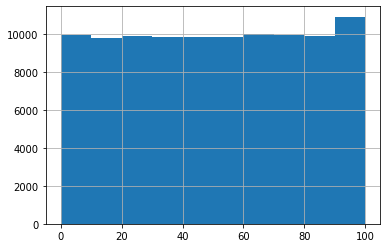

In [66]:
# Creating an empty list that is going to contain our simulated results (sim_data) 
# and then populate it by appending the results when each value in our prior distribution is 
# plugged into our generative model.

sim_data = prior.apply(lambda p: generative_model(p))
sim_data.hist()

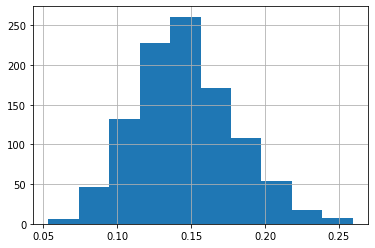

In [68]:
# Arriving at our posterior distribution by selecting only the values from our prior 
# distribution that generated instances where the simulated result matched our observed result of 14 purchases

posterior = prior[sim_data == observed]
posterior.hist()

- Looking at this, we can see that the updated probability of someone making a purchase from our online store is likely between **10% and 20%** and most likely somewhere between **12% and 15%**.

In [76]:
# Calculating a 90% credible interval for this distribution as follows.

print(posterior.quantile(.025), '|', posterior.quantile(.975))

0.08671448037898333 | 0.21796669528298457


What is the Maximum Likelihood Estimate?

In [84]:
# MLE is the technique which helps us in determining the parameters of the distribution 
# that best describe the given data.

# MLE can be defined as a method for estimating population parameters 
# (such as the mean and variance for Normal, rate (lambda) for Poisson, etc.) from sample data such 
# that the probability (likelihood) of obtaining the observed data is maximized.

rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|', round(probability, 2))

Maximum Likelihood Estimate:  0.14 | 0.13
